<a href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/7varitional_autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 24th October, 2023
#               VijayDashmi

## GMM and Variarional autoencoders

Variational encoders work to generate data in a manner that is quite similar to the way gaussian mixture model work to generate data.

## GMM process
See [here](https://www.jeremyjordan.me/gaussian-mixed-models/)

1. Initial data points

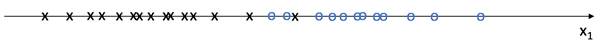

2. First guess

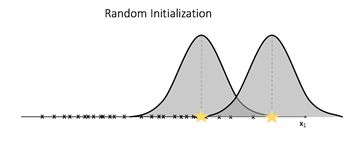

3. Imporve the first guess

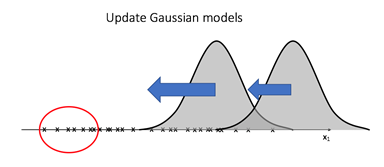

4. Final clusters

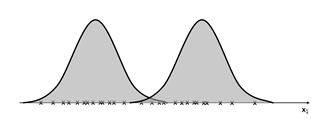

5. Same data set but <b>number of clusters</b> can be different

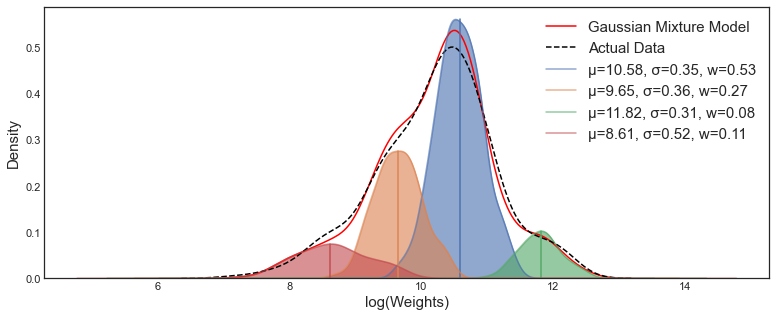

6. Same data, same number of clusters <b>but shape of clusters</b> can be different

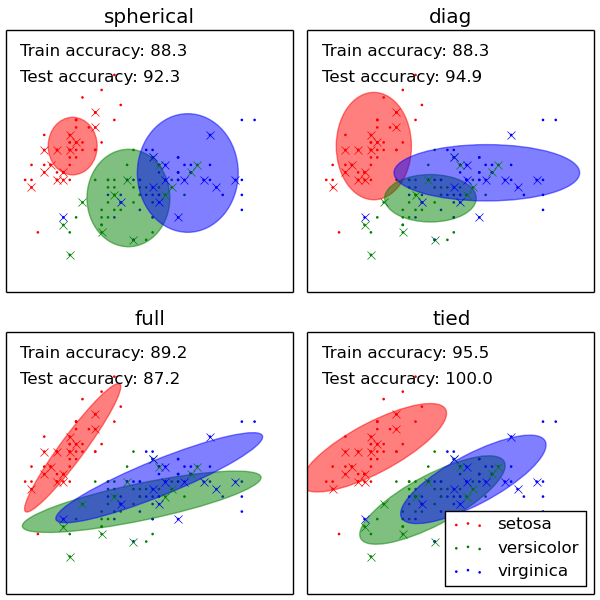

## Kmeans and GMM clustering

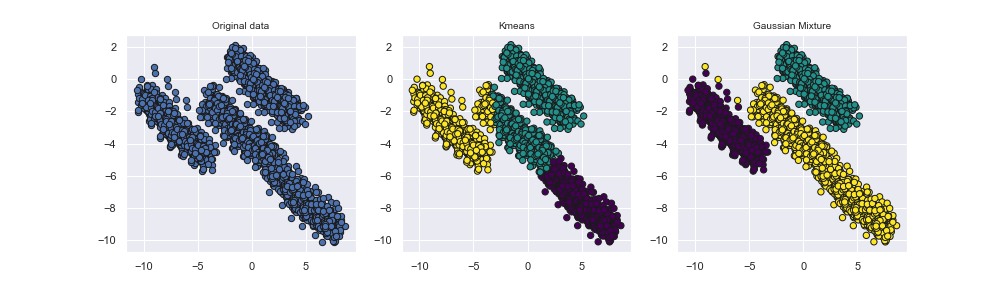

### Expectation maximization process
See maths [here](https://gsarantitis.wordpress.com/2020/09/13/gaussian-mixture-models-part-2-clustering/)

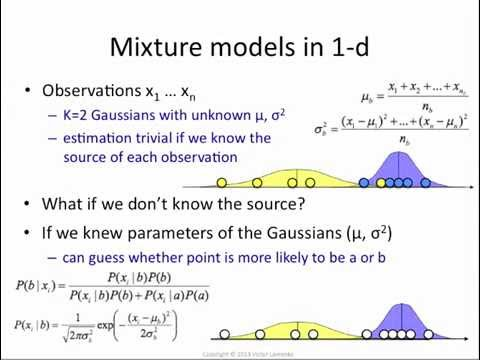

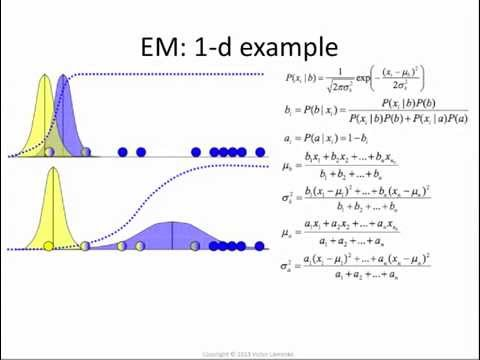

In [ ]:
# Display YouTube videos
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import YouTubeVideo
YouTubeVideo('REypj2sy_5U')
print("\n==========\n")
YouTubeVideo('iQoXFmbXRJA')

### Generating faces
How gmm acts as a generative model?

A face can be assumed to be nothing but a bundle of many Gaussian clusters oriented as per prominent facial features (see below images):

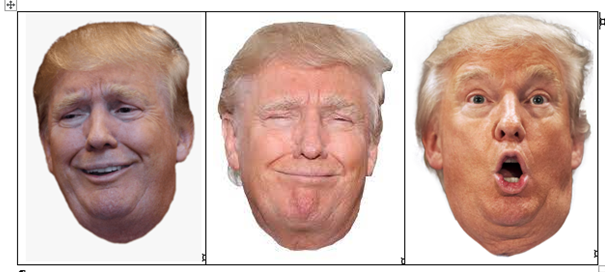



Of course, face is a mixture of not two or three but many gaussian components. So, train a GMM on faces with sufficient number of components--the more the better. For example, in a dense region (low variance) there will be large number of points producing a 'darker colour' region while in a sparse region (high variance) less density of points would give an effect to a lighter colour (shade).   

And also during learning process, allow a large number of iterations. Once distributions have been learnt, then those distributions can be used to generate points-- See below three clusters learnt on a face.    

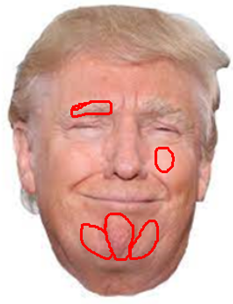

### Call libraries

In [ ]:
# 1.0 Call libraries
from sklearn.datasets import fetch_olivetti_faces
# 1.1 Import GaussianMixture class
from sklearn.mixture import GaussianMixture
# 1.2 Data manipulation
import pandas as pd
import numpy as np
# 1.3 Plotting
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
# 1.4
#import scipy.io
#import time, os

In [ ]:
# 1.5 Display multiple commands output from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Get Olivetti faces
<font size = 1> 400 images; (64 X 64) pixels</font>

Here is a sample of olivetti faces. It is composed of 40 people, a total of 400 faces;
There are 10 face pictures for each person, including front face, side face and different expressions:    


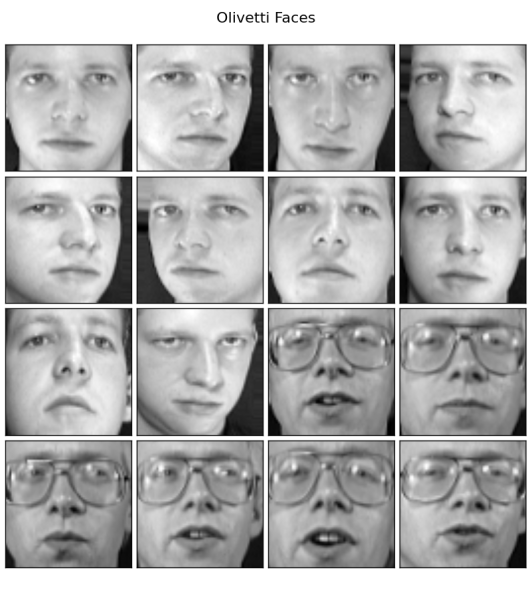

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


(400, 4096)

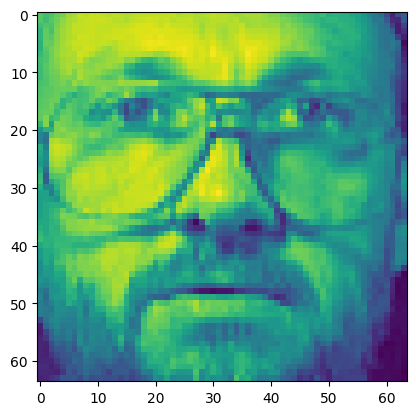

In [ ]:
# 2.0 Get olivetti faces
# Data is downloaded to:
#    /home/ashok/scikit_learn_data
#    /root/scikit_learn_data

_=faces,_ = fetch_olivetti_faces(
                                 return_X_y=True,
                                 shuffle=True
                                 )
# 2.1
faces.shape    # (400, 4096) 400 faces


# 2.2 Look at just one face:

_=imshow(faces[0, :].reshape(64,64))

### Gaussian Mixture Modeling (gmm)

A Gaussian mixture model (GMM) attempts to find a mixture of multi-dimensional Gaussian probability distributions that best model any input dataset.

#### Instantiate model

In [ ]:
# 4.0
gm_faces = GaussianMixture(
                           n_components = 3,   # More the components, better it will be
                                               # but would take more time
                           n_init = 10,
                           max_iter = 100, # The number of EM iterations to perform.
                           verbose = 1,
                           verbose_interval = 5 # No of iter done before next print.
                         )



In [ ]:
# 4.1   Train the model of the dataset:

start = time.time()
gm_faces.fit(faces)
end = time.time()
(end - start)/60     # 7 minutes

Initialization 0
Initialization converged: True
Initialization 1
Initialization converged: True
Initialization 2
Initialization converged: True
Initialization 3
Initialization converged: True
Initialization 4
Initialization converged: True
Initialization 5
Initialization converged: True
Initialization 6
Initialization converged: True
Initialization 7
Initialization converged: True
Initialization 8
Initialization converged: True
Initialization 9
Initialization converged: True


GaussianMixture(n_components=3, n_init=10, verbose=1, verbose_interval=5)

6.974387264251709

In [ ]:
# 4.2 Did algorithm(s) converge?
gm_faces.converged_     # True

True

In [ ]:
# 4.3 How many iterations were performed?

gm_faces.n_iter_      #  2

2

In [ ]:
# 4.4 Predict which 'faces' fall in which clusters:

gm_faces.predict(faces)

### Generate faces

In [ ]:
# 5.0 Generate 20 new faces
#     Takes time

start = time.time()
gen_faces = gm_faces.sample(n_samples = 20)
end = time.time()
(end- start)/60     # 3minutes


2.8753824194272357

In [ ]:
# 5.1 What do we get
len(gen_faces)       # 2; tuple with 2-objects
gen_faces[0].shape   # (20, 4096)


2

(20, 4096)

In [ ]:
# 5.2 Plot all 20 faces
im = gen_faces[0]
im.shape    # (20, 4096)

(20, 4096)

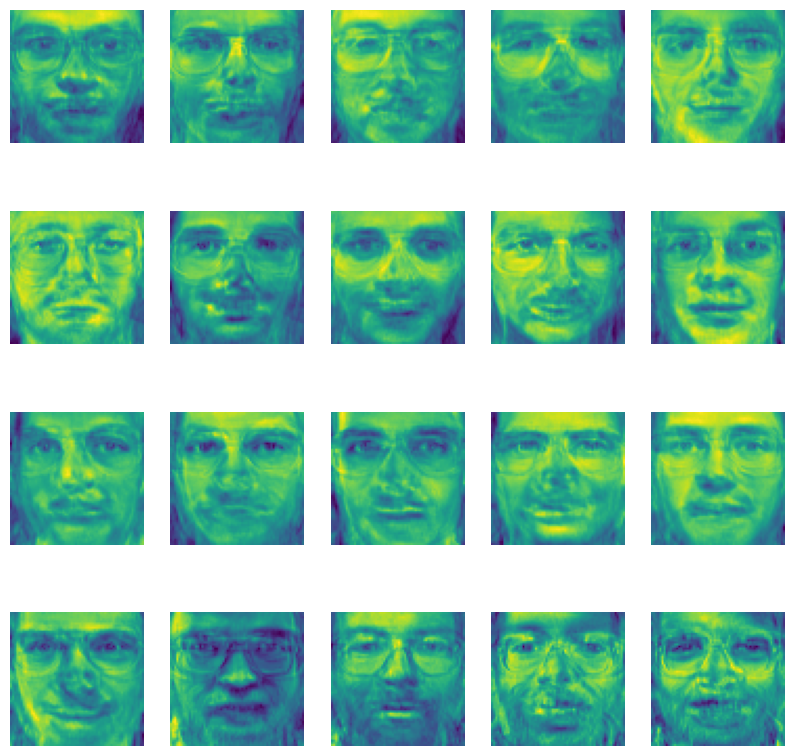

In [ ]:
# 5.3
fig = plt.figure(figsize = (10,10))

# 5.3.1
for i in range(20):
    _=plt.subplot(4,5,i+1)
    _=plt.imshow(im[i].reshape(64,64))
    _= plt.axis('off')

# Variational Autoencoder

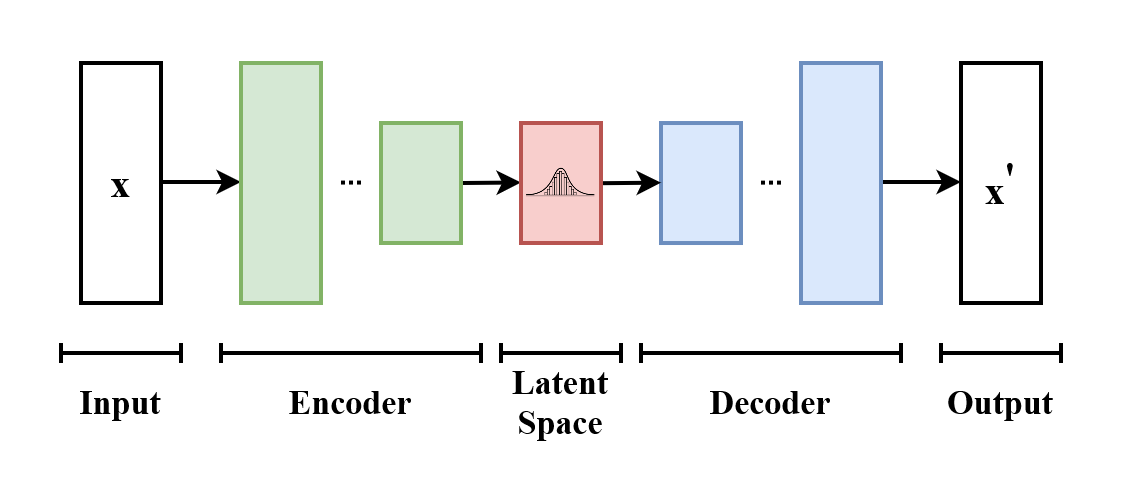

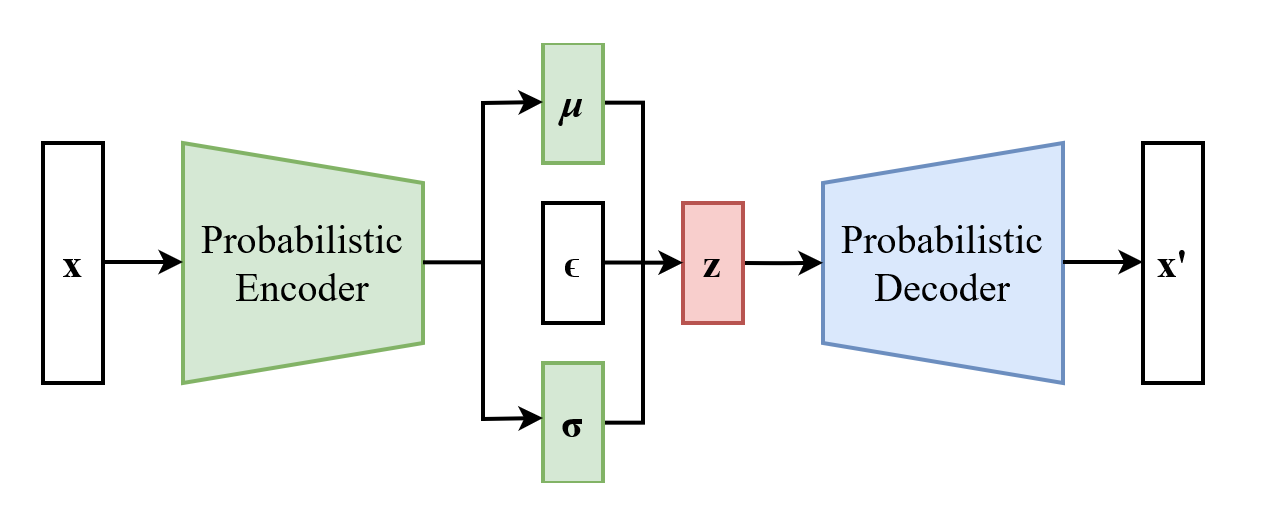

In [3]:
# 1.0 Python ≥3.5 is required
import sys

# 1.0.1 Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.preprocessing import StandardScaler

# 1.0.2 TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"
import tensorflow.keras.backend as K

# 1.0.3 Common imports
import numpy as np
import pandas as pd
import os


# 1.0.4 To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)



In [60]:
# 2.0 Where to save the figures:

PROJECT_ROOT_DIR = "."   # /content (default)
CHAPTER_ID = "vae"

# 2.0.1 Join path in the order it is written
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

# 2.0.2 Create the folder:
os.makedirs(IMAGES_PATH, exist_ok=True)  # /content/images/autoencoders


In [44]:
# 9.0 Import mnist data:

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data();

4422102/4422102 [==============================] - 0s 0us/step


In [45]:
# 9.1 Normalize data:

X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

# 9.1.1 We will work with a smaller dataset
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [46]:
# 5.2 Calculate accuracy:

def rounded_accuracy(y_true, y_pred):
    # tf.round(x) rounds the values of x to integer values.
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [51]:
# 6.1

def show_reconstructions(model, images=X_valid, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        # Original image
        # The figure has 2 rows, n_images columns, and this plot is at 1 + image_index
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])

        # Reconstructed image
        # The figure has 2 rows, n_images columns, and this plot is at 1 + n_images + image_index
        #  ie the next row
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])

In [53]:
# 2.2 Show an image in grey scale:

def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

In [57]:
# 2.1 Save figure to folder
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension) # /content/images/autoencoders/xyz.png
    print("Saving figure", fig_id)
    if tight_layout:  # Adjust figures in the given space
        plt.tight_layout() # automatically adjust so that the subplots fit in figure area.
    plt.savefig(path, format=fig_extension, dpi=resolution)

Given y, I can take a log of it as: log$_{10}$y. Let us say this log is z. Then,  
z = log$_{10}$y  
To get y back from z, I have to raise 10 to the power of z, ie:  
10$^{z}$  ie y = 10$^{z}$  OR log$_{10}$y = z

Therefore, exp(log_var / 2) will give (exp(log σ$^{2}))$$^{0.5}$ or just (σ$^{2}$)$^{0.5}$ or just σ.

In [ ]:
# tf.random_normal: https://www.tensorflow.org/api_docs/python/tf/random/normal

class Sampling(keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        out = K.random_normal(
                            shape = tf.shape(log_var)   # Output random values of given shape
                                                        #  with mean 0 and stdev 1
                            )
        out = out * K.exp(log_var / 2) + mean    # Z * σ + mean
        return out

In [4]:
# Create a sampling layer:
class Sampling(keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        out = K.random_normal(
                            tf.shape(log_var)
                            )
        out = out * K.exp(log_var / 2) + mean
        return out

In [8]:
codings_size = 10

In [29]:
inputs = keras.layers.Input(shape=[28, 28])
z = keras.layers.Flatten()(inputs)
z = keras.layers.Dense(150,
                       activation="selu")(z)

z = keras.layers.Dense(100,
                       activation="selu")(z)

In [30]:
# Encoder has two outputs:
codings_mean = keras.layers.Dense(codings_size)(z)
codings_log_var = keras.layers.Dense(codings_size)(z)



In [31]:
# And also a IIIRd one derived from above two:

codings = Sampling()([codings_mean, codings_log_var])

In [32]:
# Create encoder. But it outputs three tensors
# 'codings_mean', 'codings_log_var', 'codings'
# though in the deocder only 'codings' tensor
# is used.

variational_encoder = keras.models.Model(
                                          inputs=[inputs],
                                          outputs=[codings_mean, codings_log_var, codings]
                                          )

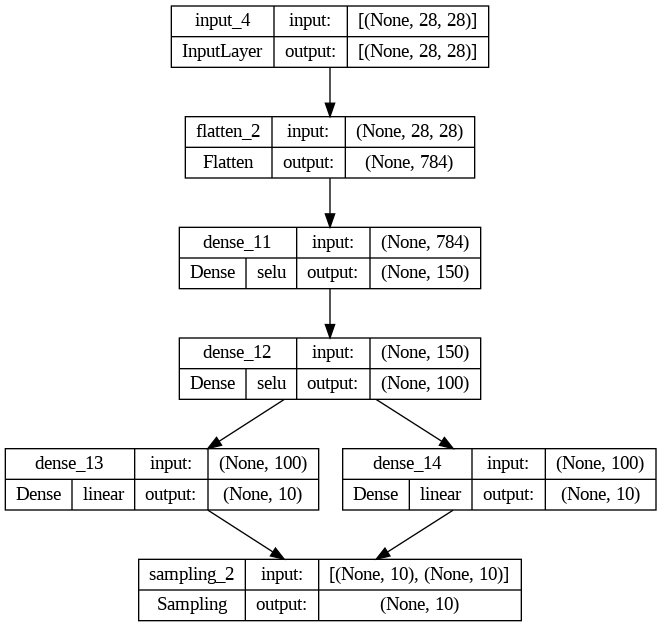

In [33]:
tf.keras.utils.plot_model(variational_encoder,
                          show_shapes=True,
                          show_layer_activations=True
                          )

In [34]:
# For decoder the only input is codings:

decoder_inputs = keras.layers.Input(shape=[codings_size])
x = keras.layers.Dense(100, activation="selu")(decoder_inputs)
x = keras.layers.Dense(150, activation="selu")(x)
x = keras.layers.Dense(28 * 28, activation="sigmoid")(x)
outputs = keras.layers.Reshape([28, 28])(x)


In [35]:
# Our decoder:
variational_decoder = keras.models.Model(
                                          inputs=[decoder_inputs],
                                          outputs=[outputs]
                                          )


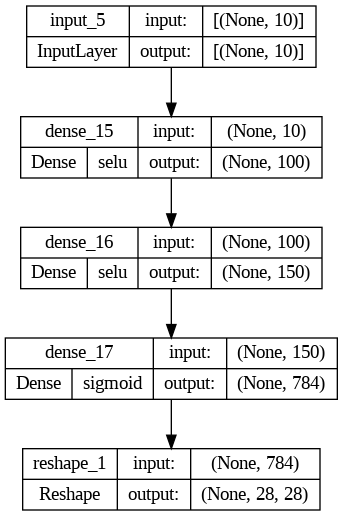

In [36]:
tf.keras.utils.plot_model(variational_decoder,
                          show_shapes = True,
                          show_layer_activations=True
                          )

In [37]:
# Get decoder output:

_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)


In [38]:
variational_ae = keras.models.Model(
                                    inputs=[inputs],
                                    outputs=[reconstructions]
                                    )

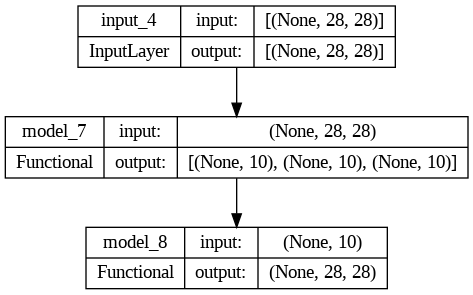

In [40]:
tf.keras.utils.plot_model(
                          variational_ae,
                          show_shapes= True,
                          show_layer_activations= True
                          )

In [42]:
# Latent loss is the sum of cross-entropy loss and KL divergence:

latent_loss = -0.5 * K.sum(
                           1 + codings_log_var - K.exp(codings_log_var) - K.square(codings_mean),
                           axis=-1
                           )

In [43]:
variational_ae.add_loss(
                         K.mean(latent_loss) / 784.
                        )

In [47]:
variational_ae.compile(loss="binary_crossentropy",
                       optimizer="rmsprop",
                       metrics=[rounded_accuracy]
                       )

In [48]:

history = variational_ae.fit(X_train,
                             X_train,
                             epochs=25,
                             batch_size=128,
                             validation_data=(X_valid, X_valid)
                             )

Epoch 1/25
430/430 [==============================] - 9s 18ms/step - loss: 0.4132 - rounded_accuracy: 0.8371 - val_loss: 0.3716 - val_rounded_accuracy: 0.8693
Epoch 2/25
430/430 [==============================] - 7s 17ms/step - loss: 0.3548 - rounded_accuracy: 0.8892 - val_loss: 0.3473 - val_rounded_accuracy: 0.8979
Epoch 3/25
430/430 [==============================] - 8s 19ms/step - loss: 0.3430 - rounded_accuracy: 0.8981 - val_loss: 0.3411 - val_rounded_accuracy: 0.8991
Epoch 4/25
430/430 [==============================] - 8s 19ms/step - loss: 0.3370 - rounded_accuracy: 0.9024 - val_loss: 0.3412 - val_rounded_accuracy: 0.9040
Epoch 5/25
430/430 [==============================] - 7s 17ms/step - loss: 0.3329 - rounded_accuracy: 0.9054 - val_loss: 0.3317 - val_rounded_accuracy: 0.9097
Epoch 6/25
430/430 [==============================] - 8s 19ms/step - loss: 0.3299 - rounded_accuracy: 0.9075 - val_loss: 0.3310 - val_rounded_accuracy: 0.9079
Epoch 7/25
430/430 [==========================

1/1 [==============================] - 0s 26ms/step


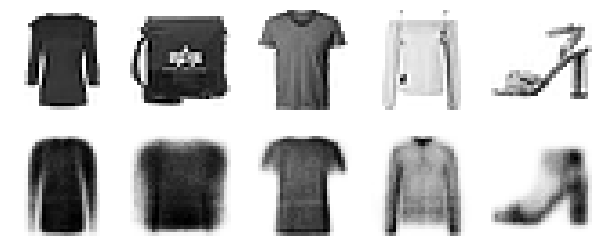

In [54]:
show_reconstructions(variational_ae)
plt.show()

## Generate Fashion Images

In [55]:
def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")

Let's generate a few random codings, decode them and plot the resulting images:

Saving figure vae_generated_images_plot


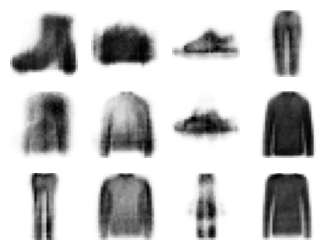

In [61]:
tf.random.set_seed(42)

codings = tf.random.normal(shape=[12, codings_size])
images = variational_decoder(codings).numpy()
plot_multiple_images(images, 4)
save_fig("vae_generated_images_plot", tight_layout=False)

Now let's perform semantic interpolation between these images:

Saving figure semantic_interpolation_plot


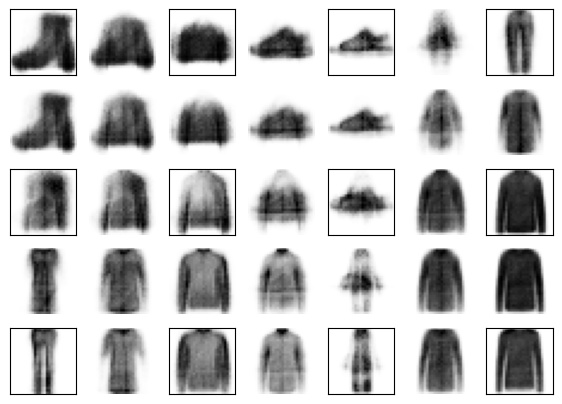

In [62]:
codings_grid = tf.reshape(codings, [1, 3, 4, codings_size])
larger_grid = tf.image.resize(codings_grid, size=[5, 7])
interpolated_codings = tf.reshape(larger_grid, [-1, codings_size])
images = variational_decoder(interpolated_codings).numpy()

plt.figure(figsize=(7, 5))
for index, image in enumerate(images):
    plt.subplot(5, 7, index + 1)
    if index%7%2==0 and index//7%2==0:
        plt.gca().get_xaxis().set_visible(False)
        plt.gca().get_yaxis().set_visible(False)
    else:
        plt.axis("off")
    plt.imshow(image, cmap="binary")
save_fig("semantic_interpolation_plot", tight_layout=False)

In [69]:
# From https://keras.io/examples/generative/vae/

def plot_label_clusters(vae, data, labels):
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = vae.predict(data)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()


157/157 [==============================] - 1s 3ms/step


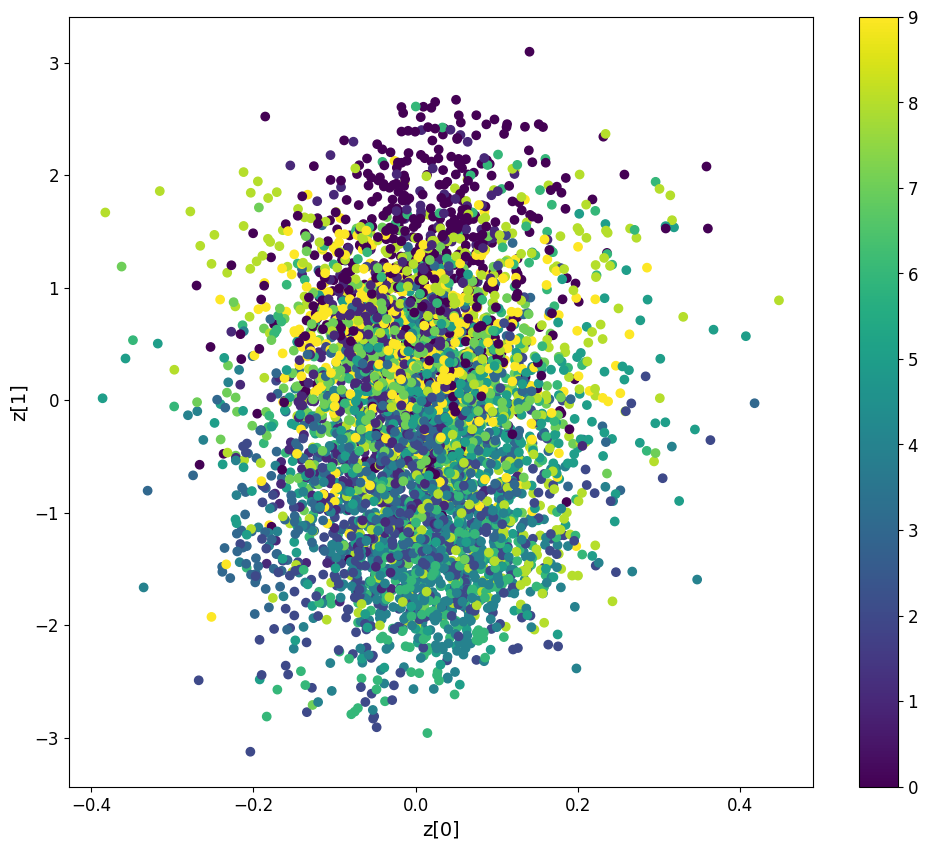

In [70]:
plot_label_clusters(variational_encoder, X_valid, y_valid)

In [ ]:
# From https://keras.io/examples/generative/vae/

(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255

plot_label_clusters(vae, x_train, y_train)
